In [1]:
#Import the required libraries

# For Exploratory Data Analysis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# For NLP
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

from IPython.display import display

In [2]:
# Read the dataset

dataset=pd.read_csv('all_classes.csv', encoding= 'unicode_escape')
dataset.head()

,text,class
0,JIM KARAG PERSONAL TRAINING,health_pcare
1,New Look LASER MEDICAL,health_pcare
2,U RICE,rest_drink
3,CIRCLE SUSHI & GRILL Dine in Carry out Delivery,rest_drink
4,ALDO,fashion


In [3]:
# Check the size of dataset

dataset.shape

(10001, 2)

In [4]:
# Check for the datatypes

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   class   10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [5]:
# Check unique categories in each variable

dataset.nunique()

text     8065
class       7
dtype: int64

In [6]:
# Check if any missing values are present

dataset.isnull().sum()

text     1
class    1
dtype: int64

In [7]:
# As there is only one missing value so we can simply ignore that

dataset.dropna(inplace=True)
dataset.isnull().sum()

text     0
class    0
dtype: int64

In [8]:
# Create a new variable for the categories of class varibale
# or use LabelEncoder() and then fit_transform()

dataset['category_id'] = dataset['class'].factorize()[0]
dataset.head()

,text,class,category_id
0,JIM KARAG PERSONAL TRAINING,health_pcare,0
1,New Look LASER MEDICAL,health_pcare,0
2,U RICE,rest_drink,1
3,CIRCLE SUSHI & GRILL Dine in Carry out Delivery,rest_drink,1
4,ALDO,fashion,2


In [9]:
# Create a sorted dataframe based on the cateogy_id variable

category_id_df = dataset[['class', 'category_id']].drop_duplicates().sort_values('category_id')
id_to_category = dict(category_id_df[['category_id', 'class']].values)
category_id_df

,class,category_id
0,health_pcare,0
2,rest_drink,1
4,fashion,2
7,finance_investing,3
8,other,4
32,food_beverage,5
80,technology,6


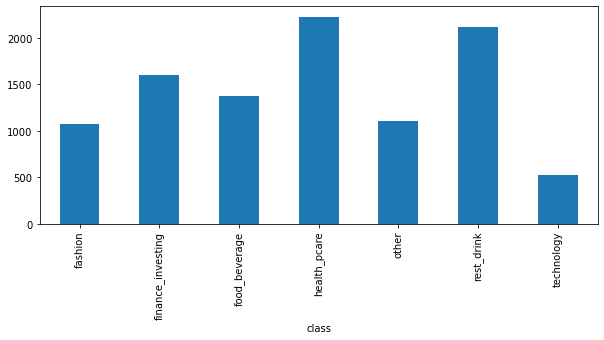

In [10]:
# Check the distribution of texts wrt class variables

plt.figure(figsize=(10,4))
dataset.groupby('class').text.count().plot.bar()

In [11]:
# Copy the dataset into X and y variables for input and output

X_processed = dataset['text']
y = dataset['class']

In [12]:
# Perform text cleaning operations

corpus=[]
wordnet=WordNetLemmatizer() # Using lemmatization for increased accuracy

for sentence in X_processed:
    sentence = sentence.lower() # Converting to lowercase
    
    # Use regex for removing punctuations
    sentence = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)
    
    # Remove unnecesary stopwords
    sentence = sentence.split()
    sentence = [wordnet.lemmatize(word) for word in sentence if word not in set(stopwords.words('english'))]
    sentence = ' '.join(sentence)
    corpus.append(sentence)
    
X_processed=corpus 

In [13]:
# Use TF-IDF for converting words into vectors
# TF (Term Frequency): How often a word appears within document
# IDF (Inverse Document Frequency): Scales down words that appear a lot accross documents

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer() #max_features=5000
tf_X = tf.fit_transform(X_processed)
X = tf_X.toarray()

features = tf_X.toarray()
labels = dataset.category_id
features.shape

(9999, 7539)

In [14]:
# Vocabulary learnt from corpus

print(tf.vocabulary_)

{'jim': 3510, 'karag': 3602, 'personal': 5182, 'training': 6908, 'new': 4728, 'look': 4039, 'laser': 3831, 'medical': 4357, 'rice': 5749, 'circle': 1392, 'sushi': 6576, 'grill': 2907, 'dine': 1942, 'carry': 1155, 'delivery': 1855, 'aldo': 206, 'bench': 694, 'factory': 2381, 'store': 6474, 'carter': 1160, 'bank': 576, 'america': 278, 'space': 6343, 'tile': 6801, 'shop': 6158, 'veruca': 7152, 'chocolate': 1346, 'west': 7333, 'marine': 4248, 'balloon': 560, 'decoration': 1834, 'party': 5076, 'rental': 5690, 'doolins': 2029, 'supply': 6559, 'haymarket': 3064, 'pub': 5491, 'brewery': 918, 'craft': 1656, 'beer': 675, 'food': 2577, 'ealthy': 2115, 'spa': 6342, 'green': 2898, 'walk': 7258, 'back': 533, 'deep': 1837, 'tissue': 6825, 'foot': 2586, 'massage': 4286, 'body': 826, 'couple': 1635, 'welcome': 7318, 'fifth': 2475, 'third': 6770, 'spectrum': 6362, 'bar': 588, 'gril': 2906, 'louie': 4057, 'kristoffers': 3756, 'cafe': 1053, 'bakery': 550, 'pasteleria': 5084, 'mangia': 4207, 'fresca': 2647

In [15]:
# Print vectorized data 
# Syntax: (Row number, Unique integer number of each word in first row)  Score Calculated by TF-IDF Vectorizer

print(tf_X)

  (0, 6908)	0.45538547261260204
  (0, 5182)	0.4503136011907772
  (0, 3602)	0.5547548129169745
  (0, 3510)	0.5311203530852903
  (1, 4357)	0.4286363190383584
  (1, 3831)	0.5360242891771517
  (1, 4039)	0.5956014054129285
  (1, 4728)	0.41738211902706174
  (2, 5749)	1.0
  (3, 1855)	0.3858011793870052
  (3, 1155)	0.42466084750006267
  (3, 1942)	0.4350532827866516
  (3, 2907)	0.35205535898608625
  (3, 6576)	0.3900910689409702
  (3, 1392)	0.4532496418777969
  (4, 206)	1.0
  (5, 6474)	0.3757313462753122
  (5, 2381)	0.5922691054884193
  (5, 694)	0.712771535704176
  (6, 1160)	1.0
  (7, 278)	0.7972121014343132
  (7, 576)	0.6036993169837831
  (8, 6343)	1.0
  (9, 6158)	0.4451922586190547
  (9, 6801)	0.8954350076167811
  :	:
  (9993, 2923)	0.22015320674926114
  (9993, 1582)	0.2555903819531333
  (9993, 3985)	0.23439563151016193
  (9993, 2577)	0.19361762268718305
  (9993, 675)	0.2338423675148132
  (9993, 6474)	0.2205632126527269
  (9994, 6671)	0.8085618791660065
  (9994, 6747)	0.5884111551963781
  (999

In [16]:
# Perform train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, dataset.index, test_size=0.3, random_state=0)


In [17]:
# Modeling with Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB

nlp_model_nb=MultinomialNB()
nlp_model_nb.fit(X_train, y_train)

y_pred_nb=nlp_model_nb.predict(X_test)

In [18]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

confusion_mat_nb=confusion_matrix(y_test, y_pred_nb)
confusion_mat_nb

array([[647,   9,   1,   4,   0,   2,   0],
       [ 51, 571,   1,   1,   2,  10,   0],
       [110,  25, 137,   6,   7,  13,   0],
       [ 13,   0,   1, 466,   0,   0,   0],
       [100,  34,   5,  25, 171,  11,   0],
       [ 19,  31,   0,   1,   2, 374,   0],
       [ 36,   6,   4,   9,   8,   2,  85]], dtype=int64)

Text(0.5, 68.09375, 'Predicted')

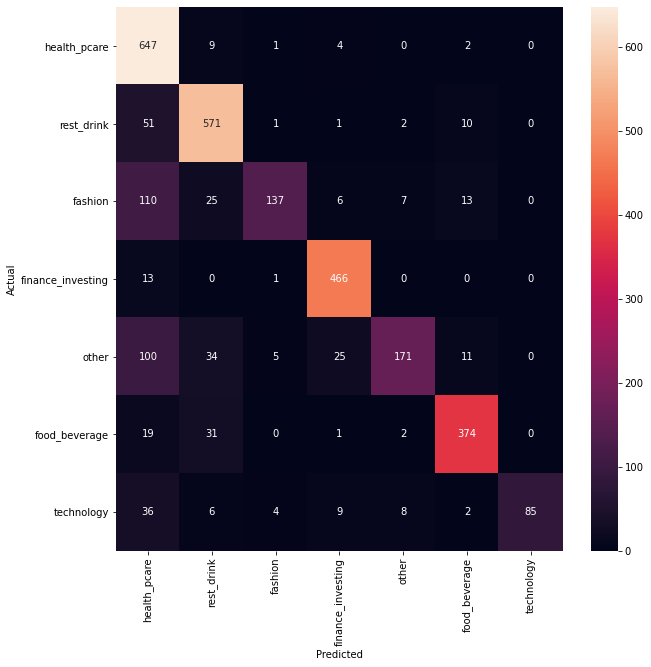

In [19]:
# Visualize Confusion Matrix

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(confusion_mat_nb, annot=True, fmt='d', xticklabels=category_id_df['class'].values, yticklabels=category_id_df['class'].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [20]:
# Accuracy Score

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test, y_pred_nb)*100
accuracy

81.69999999999999

In [21]:
nlp_model_nb.fit(features, labels)

MultinomialNB()

In [22]:
# Print Classification Report

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_nb, target_names=dataset['class'].unique()))

                   precision    recall  f1-score   support

     health_pcare       0.66      0.98      0.79       663
       rest_drink       0.84      0.90      0.87       636
          fashion       0.92      0.46      0.61       298
finance_investing       0.91      0.97      0.94       480
            other       0.90      0.49      0.64       346
    food_beverage       0.91      0.88      0.89       427
       technology       1.00      0.57      0.72       150

         accuracy                           0.82      3000
        macro avg       0.88      0.75      0.78      3000
     weighted avg       0.85      0.82      0.81      3000



In [23]:
# Modeling with Support Vector Machines

from sklearn.svm import LinearSVC

npl_model_svc = LinearSVC()
npl_model_svc.fit(X_train, y_train)

y_pred_svc = npl_model_svc.predict(X_test)

In [24]:
# Confusion Matrics

confusion_mat_svc=confusion_matrix(y_test, y_pred_svc)
confusion_mat_svc

array([[605,  30,  13,   1,   9,   3,   2],
       [  3, 591,  10,   1,  16,  15,   0],
       [ 13,  61, 188,   1,  26,   7,   2],
       [  1,   7,   4, 449,  17,   0,   2],
       [ 15,  45,  17,   7, 254,   4,   4],
       [  5,  35,   1,   2,   8, 376,   0],
       [  4,  14,   5,   1,   8,   0, 118]], dtype=int64)

Text(0.5, 68.09375, 'Predicted')

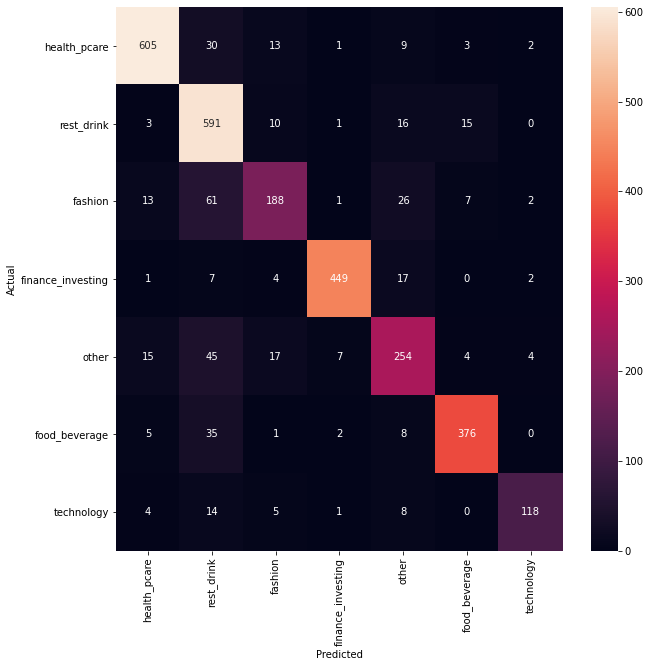

In [25]:
# Visualize Confusion Matrix

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(confusion_mat_svc, annot=True, fmt='d', xticklabels=category_id_df['class'].values, yticklabels=category_id_df['class'].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [26]:
# Accuracy Score

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test, y_pred_svc)*100
accuracy

86.03333333333333

In [27]:
# As SVC is giving better accuracy , so I will proceed with this model

npl_model_svc.fit(features, labels)

LinearSVC()

In [28]:
# Print Classification Report

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_svc, target_names=dataset['class'].unique()))

                   precision    recall  f1-score   support

     health_pcare       0.94      0.91      0.92       663
       rest_drink       0.75      0.93      0.83       636
          fashion       0.79      0.63      0.70       298
finance_investing       0.97      0.94      0.95       480
            other       0.75      0.73      0.74       346
    food_beverage       0.93      0.88      0.90       427
       technology       0.92      0.79      0.85       150

         accuracy                           0.86      3000
        macro avg       0.86      0.83      0.84      3000
     weighted avg       0.87      0.86      0.86      3000



In [29]:
# Print incorrect labels

for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and confusion_mat_svc[actual, predicted] >= 10:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], confusion_mat_svc[actual, predicted]))
            display(dataset.loc[indices_test[(y_test == actual) & (y_pred_svc == predicted)]][['class', 'text']])
            print('')

'fashion' predicted as 'health_pcare' : 13 examples.


,class,text
1495,fashion,AT MS FAMILY
4757,fashion,TOMMY HILFIGER
6648,fashion,NV MY EYEWEAR
8681,fashion,K-LABA HAIR & BEAUTY SUPPLIES Wigs Hair Extens...
6541,fashion,Two Sisters AFRICAN HAIR BRAIDING
3156,fashion,HEART & SOLE
50,fashion,CHICAGO COSTUME
6153,fashion,Beautesache Medical Aesthetics
8839,fashion,Super Optical GLASSES SUN GLASSES CONTACTS EYE...
2405,fashion,The village Quire



'other' predicted as 'health_pcare' : 15 examples.


,class,text
4644,other,MODERN TAEKWONDO CENTER
1283,other,Sylvan Learning
8203,other,NCS NOIR COSMETIC STUDIO
277,other,STORY INSTITUTE Smart training with purpose
7323,other,REACH Learning Center Where childern will have...
6104,other,Bridgeway Center Bridgeway Community Services
188,other,PAULINE GRACE
2980,other,MATION CENTER
8327,other,CAT
4265,other,Senior Connection



'health_pcare' predicted as 'rest_drink' : 30 examples.


,class,text
7647,health_pcare,TOA
201,health_pcare,SABON
2569,health_pcare,PHARMASAVE
150,health_pcare,myeyeDr
2060,health_pcare,Rothrock's Kung Fu & Tai Chi
4981,health_pcare,PHARMASAVE
2140,health_pcare,eHealth Saskatchewan
4443,health_pcare,VARIEDADES J&J
2384,health_pcare,SANTOSHAYOGAWESTBORO
2402,health_pcare,hybridpharm



'fashion' predicted as 'rest_drink' : 61 examples.


,class,text
4721,fashion,UNTUCKit
580,fashion,T HIR H VEN
4379,fashion,MAdRAg
7536,fashion,JEANNIE'S BOUTIQU
5814,fashion,MARSTON LUCE
...,...,...
3240,fashion,MARIKA'S ANTIQU
5850,fashion,GOODWILL
9708,fashion,NETTLE'S TALE
311,fashion,GAARNEAU



'other' predicted as 'rest_drink' : 45 examples.


,class,text
1103,other,YAMO
7977,other,SALUS
7414,other,Mahmawi-atoskiwin
4087,other,HARRISON REFRIDGERATION
2081,other,THE CYCLERY
8309,other,fat panda come KICK IT
7985,other,COVER TO COVER
2031,other,SMOKIN JOES saloon
9568,other,Beguiling
574,other,KOMRI ENGINEERING



'food_beverage' predicted as 'rest_drink' : 35 examples.


,class,text
6275,food_beverage,MARKET DELI HOME MADE BREAKFAST LUNCH AMERICAN...
8980,food_beverage,LA POPULAR BAKERY
565,food_beverage,BulkBarn
8329,food_beverage,The Carver's Knife
7944,food_beverage,Pepper's FOOD GROCERIES SNACKS DRINKS WINGS FI...
3828,food_beverage,Olive CONNECTION
8654,food_beverage,Trident SUNNY'S EXPRESS Trident
8392,food_beverage,GIFT ME CHOCOLATE & ENTERTAINMENT
6554,food_beverage,TREATMENT Bakery
6277,food_beverage,MEXICAN FRUITS



'technology' predicted as 'rest_drink' : 14 examples.


,class,text
2535,technology,scratch
2128,technology,iRepair
5121,technology,U2mobile
1069,technology,compupod
5654,technology,BALADO
1852,technology,Vistek
2390,technology,VIDEOSHIP
7865,technology,FASTSIGNS
6147,technology,MOVIL vigo
4707,technology,Anime Zakka



'health_pcare' predicted as 'fashion' : 13 examples.


,class,text
6879,health_pcare,Simply Beautiful E Co
5926,health_pcare,SECRETS OF NATURE
4687,health_pcare,bluemercury
4674,health_pcare,SEE
5845,health_pcare,bluemercury
2607,health_pcare,IRON NORTH STUDIO pedal run lift stretch
8783,health_pcare,RiTZY RAGS WIGS & MORE GIFTS CARDS JEWELRY THE...
4348,health_pcare,La Magia BABER SHOP
5793,health_pcare,SEE
9717,health_pcare,stripped LADIES & GENTS WAX BAR



'rest_drink' predicted as 'fashion' : 10 examples.


,class,text
1946,rest_drink,GLEBE CENTRAL
42,rest_drink,IRON LOTUS
1286,rest_drink,Green Bamboo
776,rest_drink,bamboo asia
508,rest_drink,KARL STRAUSS BREWING COMPANY
5895,rest_drink,Falls Road
896,rest_drink,Tu Lan
2584,rest_drink,10 fourteen
8594,rest_drink,BIG EASY
9309,rest_drink,au bon pain



'other' predicted as 'fashion' : 17 examples.


,class,text
4228,other,MR. SWEEPER VACUUM & SEWING
2092,other,Liv Liv Beyond
6561,other,KIDS R US LEARNING ACADEEMY
8184,other,La BOUTIQUE LIVRE
3842,other,BEACON CLEANERS Expert Tailoring
8791,other,TOOLS HOME IMPROVEMENT OUTLET
7936,other,Source for sports
9752,other,GREEN PANDA
5076,other,KUSAK'S FINE CRYSTAL
1282,other,ARMSTRONG'S CARPET and LINOLEUM CO.



'rest_drink' predicted as 'other' : 16 examples.


,class,text
7979,rest_drink,MR. CALZONE
125,rest_drink,DOWNTOWN DOGS
3019,rest_drink,Remington's OF BOSTON EATING & DRINKING EXCHANGE
9505,rest_drink,Casa MONO
1788,rest_drink,WOLF DOWN
2378,rest_drink,East Wind
3055,rest_drink,spicy world
174,rest_drink,Racine Plumbing
9856,rest_drink,Brandiz Bar & Hotel
2244,rest_drink,99 Cake



'fashion' predicted as 'other' : 26 examples.


,class,text
6718,fashion,south moon under
334,fashion,JACK JONES
6575,fashion,Total Glamour
6665,fashion,Something new Thrift
8258,fashion,alish MASS MUSCLE GEAR
5099,fashion,Little HAVANA VISITORS CENTER
6272,fashion,Trade Linker Importer & Exporter of Bedding To...
5371,fashion,MANY MOONS
5366,fashion,MANY MOONS
3125,fashion,The Black Dog



'finance_investing' predicted as 'other' : 17 examples.


,class,text
4237,finance_investing,RF/MAX ACHIEVERS
6419,finance_investing,MULTI SERVICES & TAX IMMIGRATION FORMS/NOTARY/...
4033,finance_investing,MODERN ENTERPRISES EDWARD ABOUZEID
5891,finance_investing,edc ENVIRONMENTAL DESIGN & CONSTRUCTION
4398,finance_investing,LAW OFFICES OF PETER J. MARTINO JR. & NICHOLAS...
7044,finance_investing,KUMAS HOMES
9348,finance_investing,ABC BAIL BONDS SERVICING ALL NEW JERSEY COURTS
5617,finance_investing,USA INTERNATIONAL SERVICES
8424,finance_investing,Professional CONSULTING COMPANY INC Architectu...
1194,finance_investing,Golden BAY INSURAN E AGENCY



'rest_drink' predicted as 'food_beverage' : 15 examples.


,class,text
5988,rest_drink,FRESH SEAFOOD
779,rest_drink,LAO table
6005,rest_drink,COBS BREAD
9537,rest_drink,Hasty Market OPEN 7 DAYS
8263,rest_drink,COLD TURKEY
4412,rest_drink,Deli
9217,rest_drink,FRESH & COOKED SEAFOOD The Real Seafood People
938,rest_drink,blush! wine . beer . food
9298,rest_drink,EL MERKURY STREET FOOD
2400,rest_drink,the cupcake lounge All Natural Gourmet Backed ...
